In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

from scipy.stats import jarque_bera
from sklearn.metrics import r2_score
import warnings

from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

warnings.filterwarnings('ignore')
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [20,8]
# lags=60
# precent_train_set = 0.9
# rolling_value = 10


In [2]:
df_1 = pd.read_csv('../../data_dm/eugen/FB.csv', header=0, index_col=0, parse_dates=True)
df_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2021-02-24,262.329987,266.380005,258.390015,264.309998,264.309998,15736100
2021-02-25,262.299988,266.940002,254.039993,254.690002,254.690002,19053100
2021-02-26,256.470001,265.549988,256.470001,257.619995,257.619995,26593900


In [3]:
df_1 = pd.read_csv('../../data_dm/eugen/NFLX.csv', header=0, index_col=0, parse_dates=True)
df_1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2021-02-24,539.799988,556.849976,539.070007,553.409973,553.409973,3245000
2021-02-25,550.270020,556.479980,535.750000,546.700012,546.700012,4252900
2021-02-26,546.510010,553.090027,538.000000,538.849976,538.849976,3754600


In [4]:
df_1 = pd.read_csv('../../data_dm/eugen/gdp_poland.csv', header=0, index_col=0, parse_dates=True)
df_1

,gdp
Data,
1990-01-01,6.597775e+10
1991-01-01,8.550094e+10
1992-01-01,9.433705e+10
1993-01-01,9.604565e+10
1994-01-01,1.108034e+11
1995-01-01,1.422928e+11
1996-01-01,1.601932e+11
1997-01-01,1.593578e+11
1998-01-01,1.746858e+11


In [5]:
df = pd.read_csv('../../data_dm/eugen/gdp_ukraine.csv', header=0, index_col=0, parse_dates=True)
df

,gdp
date,
1987-01-01,6.408769e+10
1988-01-01,7.470352e+10
1989-01-01,8.270916e+10
1990-01-01,8.145692e+10
1991-01-01,7.746456e+10
1992-01-01,7.394224e+10
1993-01-01,6.564856e+10
1994-01-01,5.254956e+10
1995-01-01,4.821387e+10


# NFLX

In [3]:
df = pd.read_csv('../../data_dm/eugen/FB.csv', header=0, index_col=0, parse_dates=True, dtype='float32')
# df = df 
y = pd.DataFrame(df['Close'])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576384.0
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192704.0
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600.0
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000.0
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200.0
...,...,...,...,...,...,...
2021-02-24,262.329987,266.380005,258.390015,264.309998,264.309998,15736100.0
2021-02-25,262.299988,266.940002,254.039993,254.690002,254.690002,19053100.0
2021-02-26,256.470001,265.549988,256.470001,257.619995,257.619995,26593900.0


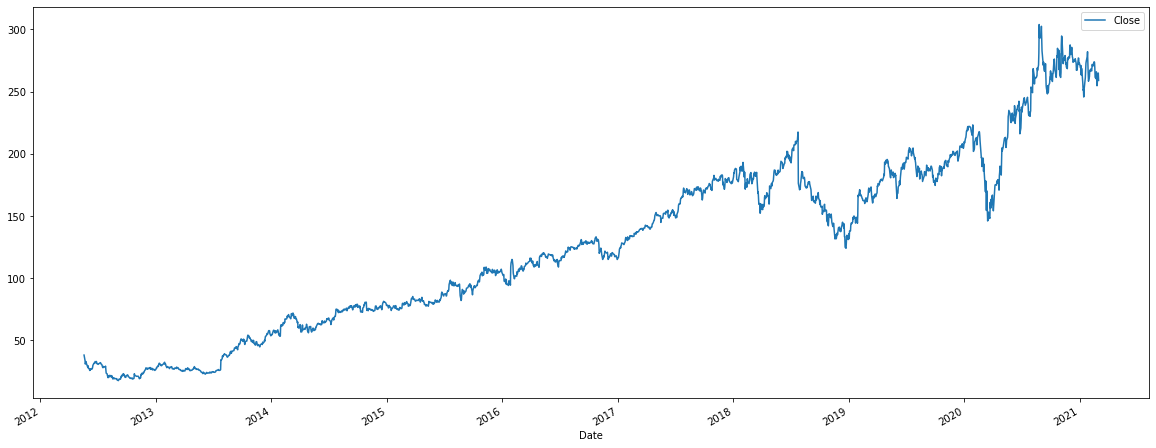

In [4]:
y.plot()

In [5]:
y

,Close
Date,
2012-05-18,38.230000
2012-05-21,34.029999
2012-05-22,31.000000
2012-05-23,32.000000
2012-05-24,33.029999
...,...
2021-02-24,264.309998
2021-02-25,254.690002
2021-02-26,257.619995


## Decompose data

In [6]:
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

In [7]:
seasonal_decompose(y)

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

## Checking Stationarity (do not work for gdp)

In [8]:
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=rolling_value).mean() 
    rolstd = pd.Series(timeseries).rolling(window=rolling_value).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

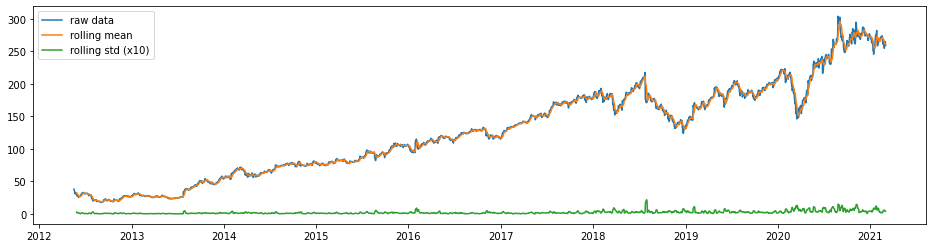

In [9]:
rolling_value = 7

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y.Close,'raw data')

## Augmented Dickey-Fuller Test

In [10]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [11]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -0.565
P-value = 0.879
Critical values :
	1%: -3.433338123180619 - The data is not stationary with 99% confidence
	5%: -2.862860055130884 - The data is not stationary with 95% confidence
	10%: -2.567472730288902 - The data is not stationary with 90% confidence


## Detrending

In [12]:
rolling_value = 2


 > Is the de-trended data stationary ?
Test statistic = -23.722
P-value = 0.000
Critical values :
	1%: -3.4333326714656223 - The data is  stationary with 99% confidence
	5%: -2.8628576479452597 - The data is  stationary with 95% confidence
	10%: -2.5674714486226202 - The data is  stationary with 90% confidence


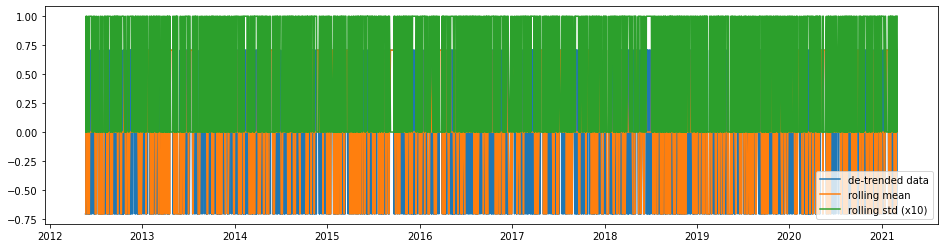

In [13]:
# Detrending
y_detrend =  (y - y.rolling(window=rolling_value).mean())/y.rolling(window=rolling_value).std()

test_stationarity(y_detrend.Close,'de-trended data')
ADF_test(y_detrend,'de-trended data')

## Differencing

 > Is the 1 lag differenced data stationary ?
Test statistic = -10.123
P-value = 0.000
Critical values :
	1%: -3.433338123180619 - The data is  stationary with 99% confidence
	5%: -2.862860055130884 - The data is  stationary with 95% confidence
	10%: -2.567472730288902 - The data is  stationary with 90% confidence


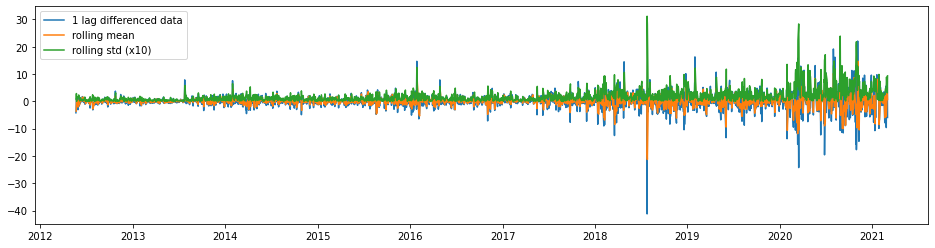

In [14]:
# Differencing
diff_model = 1
y_10lag =  y - y.shift(diff_model)

test_stationarity(y_10lag.Close,f'{diff_model} lag differenced data')
ADF_test(y_10lag,f'{diff_model} lag differenced data')

## Combining Detrending and Differencing


 > Is the 1 lag differenced de-trended data stationary ?
Test statistic = -17.868
P-value = 0.000
Critical values :
	1%: -3.4333656834518345 - The data is  stationary with 99% confidence
	5%: -2.86287222420477 - The data is  stationary with 95% confidence
	10%: -2.567479209522704 - The data is  stationary with 90% confidence


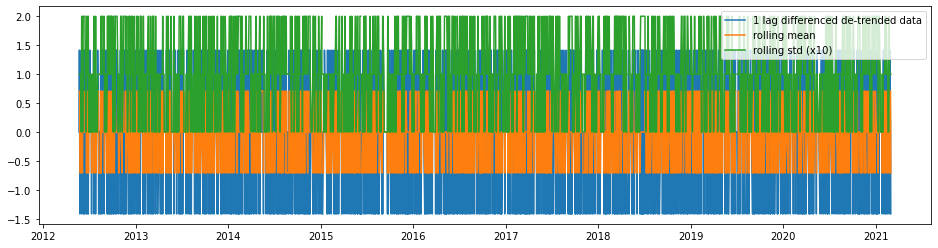

In [15]:
y_10lag_detrend =  y_detrend - y_detrend.shift(diff_model)

test_stationarity(y_10lag_detrend.Close,f'{diff_model} lag differenced de-trended data')
ADF_test(y_10lag_detrend.Close,f'{diff_model} lag differenced de-trended data')

## Create Training & Testing Datasets


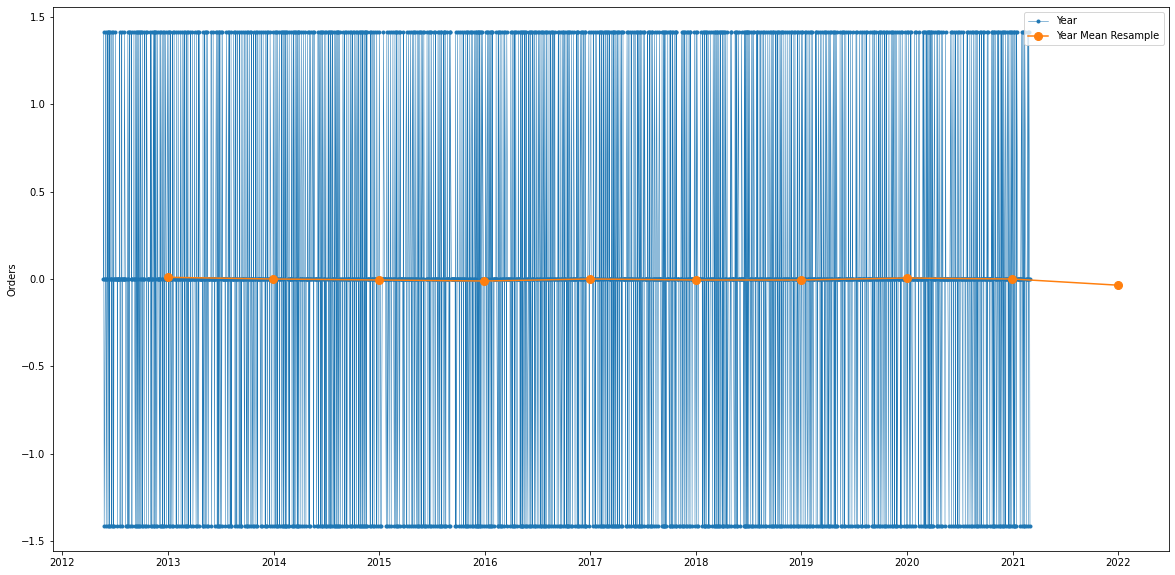

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(y_10lag_detrend,marker='.', linestyle='-', linewidth=0.5, label='Year')
ax.plot(y_10lag_detrend.resample('Y').mean(),marker='o', markersize=8, linestyle='-', label='Year Mean Resample')
ax.set_ylabel('Orders')
ax.legend();

In [17]:
def calculate_metrics_sample(y):
   
    print('yes')
    sample = pd.Series(y)
    
    y_dict = dict()

#     y_dict['series'] = 'Y'
    
    y_dict['observations'] = sample.size
    y_dict['mode'] = sample.mode()[0]
    y_dict['mean'] = sample.mean()
    y_dict['median'] = sample.median()
    y_dict['variation'] = sample.var()
    y_dict['skewness'] = sample.skew()
    y_dict['kurtosis'] = sample.kurt()
    y_dict['jarque-bera'] = jarque_bera(sample).statistic
    y_dict['probability'] = jarque_bera(sample).pvalue
    
    return pd.DataFrame(np.array([[metr] for metr in y_dict.values()]).T, 
                        columns=[ 'observations', 'mode','mean','median',
                                 'variation','skewness','kurtosis','jarque-bera','probability']).astype('float16')#,'params_ar','params_intercept'])

## Metrics

In [18]:
# columns =['name', 'r2', 'RMSE','MAE','sum_squared_resid','AIC','durbin_watson','theil_index']

# models_metrics_static = pd.DataFrame(columns=columns)
# models_metrics_static_test = pd.DataFrame(columns=columns)

calculate_metrics_sample(y.Close)

yes


,observations,mode,mean,median,variation,skewness,kurtosis,jarque-bera,probability
0,2210.00000000,26.84375000,126.68750000,123.93750000,4912.00000000,0.27124023,-0.75097656,79.12500000,0.00000000


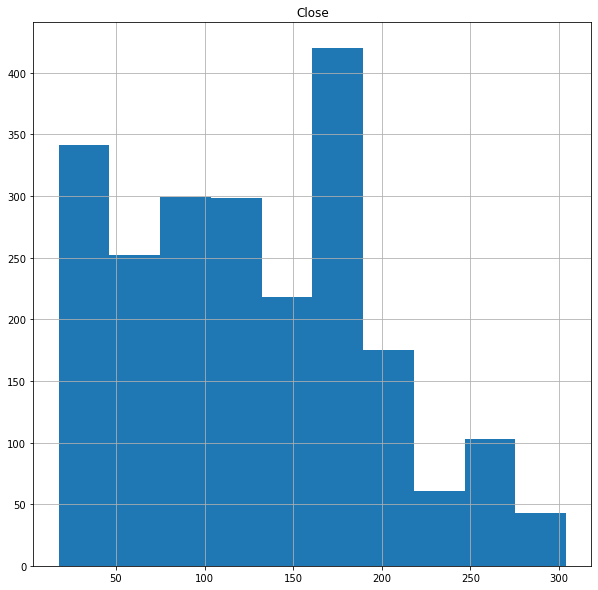

In [19]:
y.hist(figsize=(10,10))
plt.show()

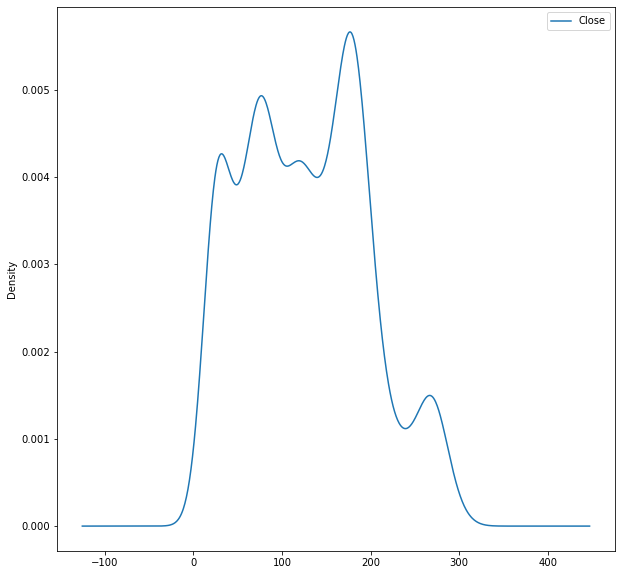

In [20]:
y.plot(kind='kde', figsize=(10,10))
plt.show()

## Box and Whisker Plots by Interval (for GDP does not work)

### Years

In [21]:
groups = y.groupby(pd.Grouper(freq='Y'))
years = pd.DataFrame()
for name, group in groups:
#     print(name.year)
#     print(np.reshape(group.values, (-1,)))
#     print(name.year)
    years[name.year] = np.reshape(group.values, (-1,))
    
# years.plot(kind='boxplot', subplots=True, legend=False, figsize=(15, 20))
plt.figure(figsize=(10,5))
years.boxplot()
plt.show()

ValueError: Length of values does not match length of index

### Months

In [25]:
one_year = y['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))

months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)


plt.figure(figsize=(10,5))
months.boxplot()
plt.show()

NameError: name 'series' is not defined

### Box-Cox Transformed Dataset

Lambda:	0.592328279000689


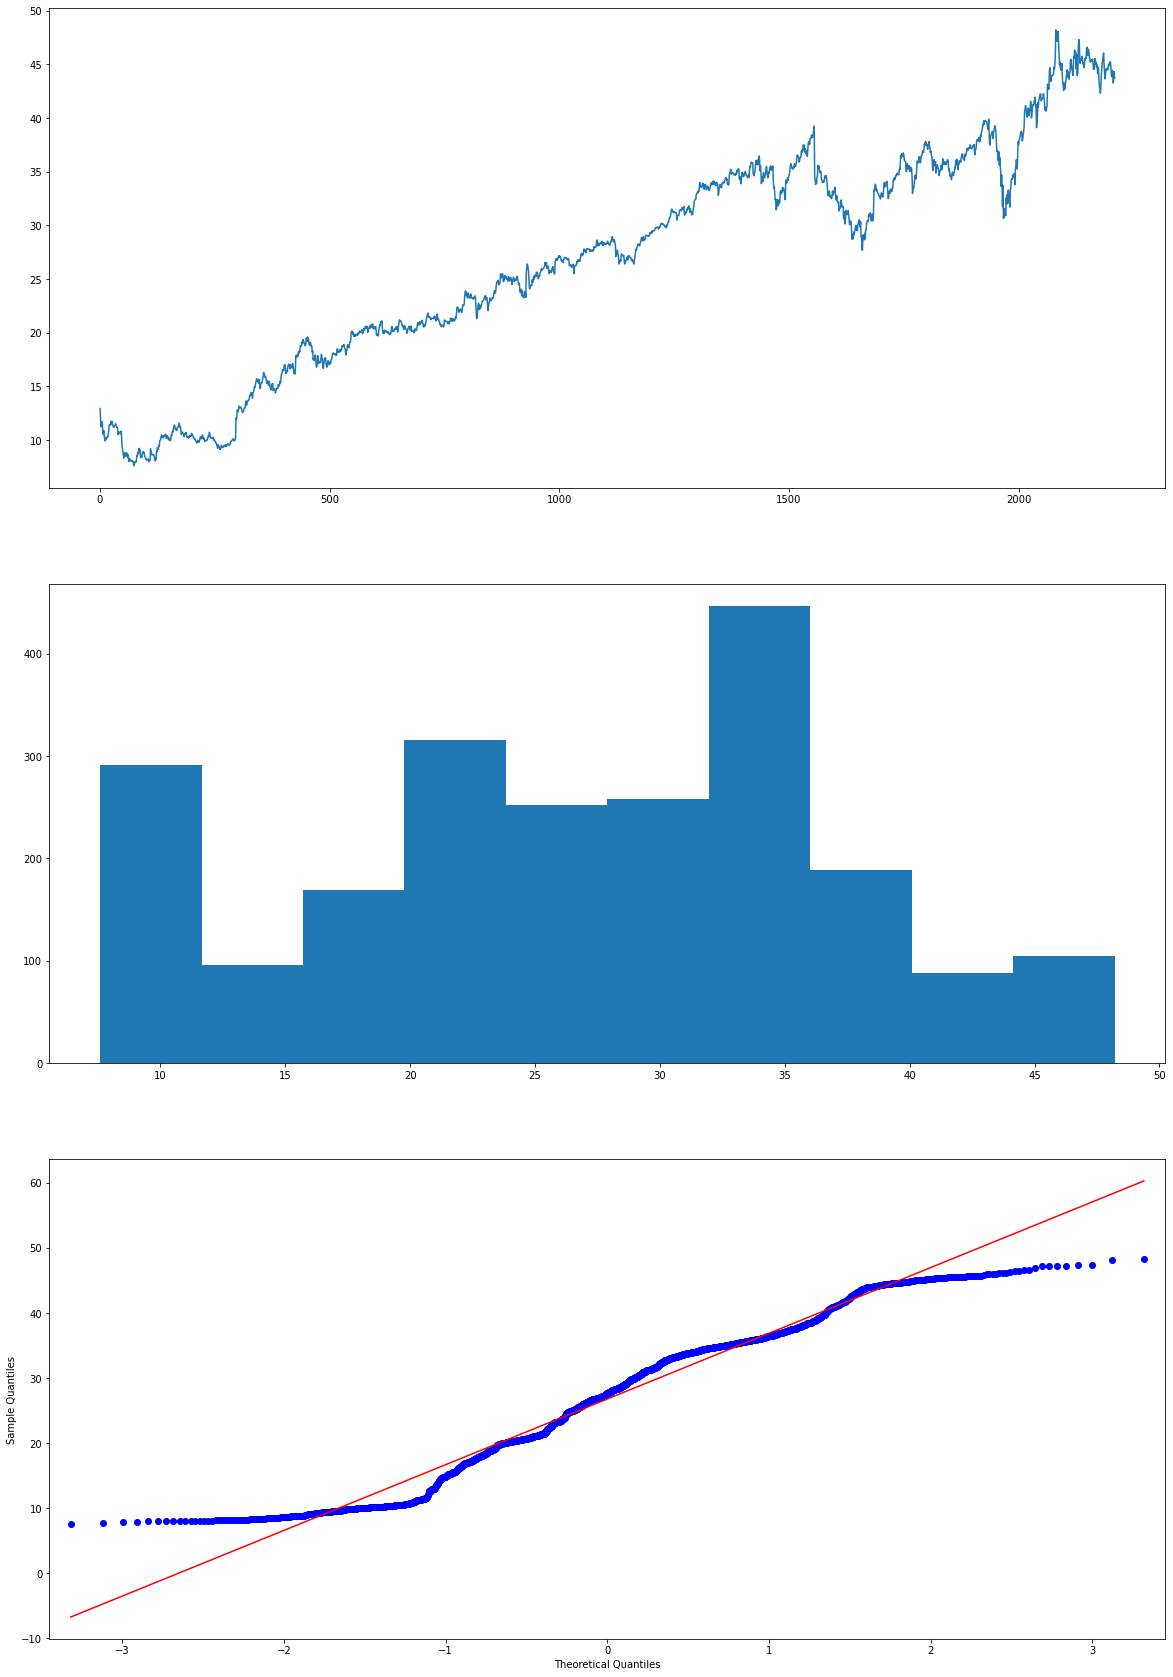

In [22]:
from scipy.stats import boxcox
from statsmodels.graphics.gofplots import qqplot

X = y.Close
transformaed, lam = boxcox(X)

print(f'Lambda:\t{lam}')

plt.figure(figsize=(20,30))
plt.subplot(311)
plt.plot(transformaed)
plt.subplot(312)
plt.hist(transformaed)
#q-q plot
plt.subplot(313)
qqplot(transformaed, line='r', ax=plt.gca())
plt.show()

In [23]:
def show_plots(y):
    sample = pd.Series(y)
#     plt.subplot(311)
#     plt.figure(figsize=(20,6))
    plt.title('Sample')
    plt.xlabel('k')
    plt.ylabel('y')
    plt.plot(sample, marker='o')
    plt.grid(True)
    

#     plt.subplot(312)
    plot_acf(sample, lags=lags);
    
#     plt.subplot(313)
    plot_pacf(sample, lags=lags);
    
    plt.show()

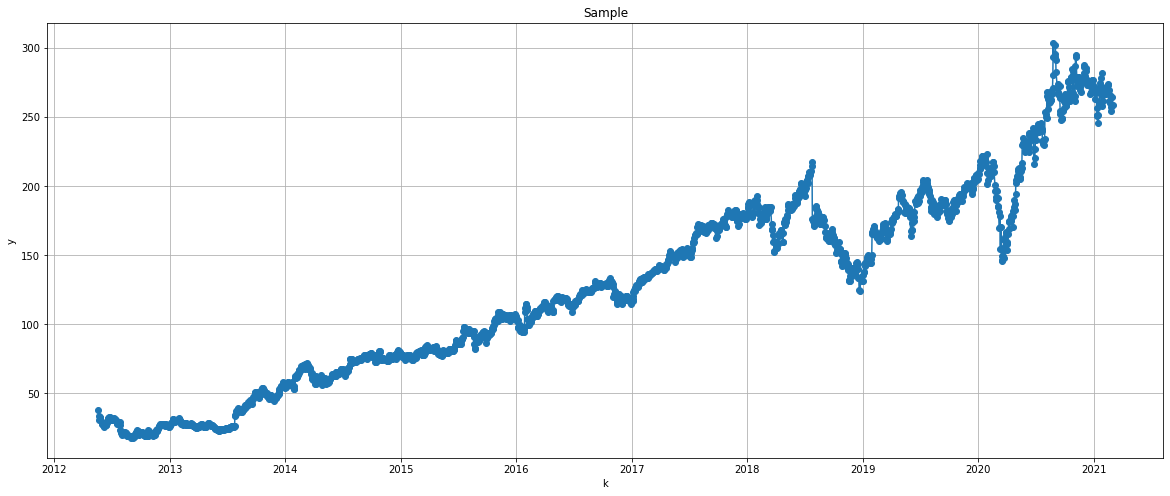

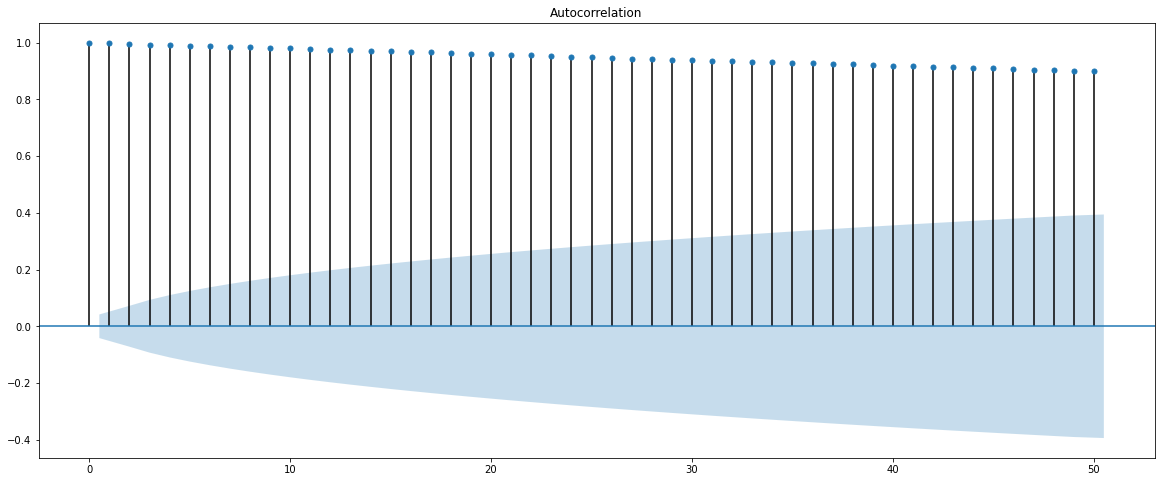

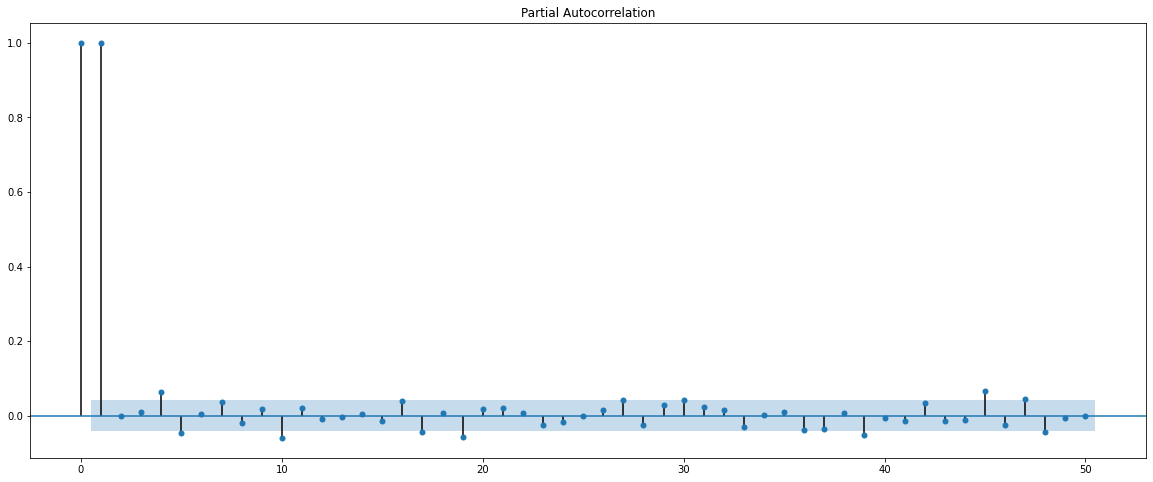

In [25]:
lags=50
show_plots(y.Close)

## Preparing data 


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

def barplot(data, title):
#     fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=data['feature'], y=data['value'])
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

class DiffData(BaseEstimator, TransformerMixin):
    
    def __init__(self, diff_model=0, box_cox=False, ln=False):
        self.diff_model = diff_model
        self.box_cox = box_cox
        self.ln = ln
        
    def fit(self, X, y=None):
        
        index = X.index
        y_value = X['Close'].values
                
#         print(X_copy)
        if self.box_cox:
            transformed, self.lmbd = boxcox(y_value)   

            
        if not self.box_cox and self.ln:
            transformed = np.log(y_value)
            
        transformed = pd.DataFrame({f'value' : y_value}, index=index)             
        
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        
        index = X.index
        y_value = X['Close'].values
        
        if self.box_cox:
            transformed  = boxcox(y_value, lmbda=self.lmbd)
        
        if not self.box_cox and self.ln:
            transformed = np.log(y_value)
        
        transformed = pd.DataFrame({f'value' : y_value}, index=index)
        
#         transformed =  (transformed - transformed.shift(self.diff_model)).dropna()
        if self.diff_model:
            transformed =  transformed - transformed.shift(self.diff_model)
        
        
        return transformed
    
class PrepareData(BaseEstimator, TransformerMixin):
    def __init__(self, lags=0, window=2):
#         self.box_cox = box_cox
        self.lags = lags
        self.window = window
#         self.diff = diff_model
        
    def fit(self, X, y=None):
#         X_copy = X.copy()
        
#         transformed = pd.DataFrame()
        
#         if self.box_Cox:
#             transformed, self.lmbd = boxcox(X_copy)            
        
#         transformed =  transformed - transformed.shift(self.diff_model)

        
#         for i in range(1, self.lags + 1):
#             transformed[f'y-{i}'] = transformed['value'].shift(i)

#         for i in range(2, self.window + 1):
#             transformed[f'window_mean_{i}'] = transformed['value'].rolling(window=i).mean()
#             transformed[f'window_std_{i}'] = transformed['value'].rolling(window=i).std()
        
        return self
    
    def transform(self, X, y=None):
        X_copy = X.copy()
        index = X_copy.index
        y_value = X['value'].values
        
        df_temp = pd.DataFrame({'value':y_value}, index=index)
        
        transformed = pd.DataFrame()
        
        for i in range(1, self.lags + 1):
            transformed[f'y-{i}'] = df_temp['value'].shift(i)

        for i in range(2, self.window + 1):
            transformed[f'window_mean_{i}'] = df_temp['value'].rolling(window=i).mean()
            transformed[f'window_std_{i}'] = df_temp['value'].rolling(window=i).std()
        
        transformed['value'] = y_value
        return transformed.dropna()
    

# prepera = Pipeline([('diff_box_cox', DiffData(diff_model=1, box_cox=True)), 
#                 ('prepare',PrepareData(lags=2, window=2))])

# prepera.fit(y, y)

## Fiting Models

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge, SGDRegressor, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold

from xgboost import XGBRegressor, XGBRFRegressor

from modules import define_metrics, get_score_for_model

In [29]:
def show_pred(y_train, y_test, y, title):
    y_train_copy = pd.Series(y_train, index=y.index[:len(y_train)])
    y_test_copy = pd.Series(y_test, index=y.index[-len(y_test):])
    
#     print(y_test_copy)
#     print(f'y_train_copy shape:\t{y_train_copy.shape}')
#     print(f'y_test_copy shape:\t{y_test_copy.shape}')
#     print(f'y shape:\t{y.shape}')
    
    plt.plot(y_train_copy, label='y_train_predicted')
    plt.plot(y_test_copy, label='y_test_predicted')
    plt.plot(y, label='y_real')
    plt.title(title)
    plt.legend()
    plt.show()


## Without preaparations (diff and ln)

In [30]:
pipeline_repare_without = Pipeline([('diff_box_cox', DiffData(diff_model=0, box_cox=False)), 
                ('prepare',PrepareData(lags=10, window=4))])

pipeline_repare_without.fit(y, y)

data_prepare_without = pipeline_repare_without.transform(y)
data_prepare_without

,y-1,y-2,y-3,y-4,y-5,y-6,y-7,y-8,y-9,y-10,window_mean_2,window_std_2,window_mean_3,window_std_3,window_mean_4,window_std_4,value
Date,,,,,,,,,,,,,,,,,
2012-06-04,27.71999931,29.60000038,28.19000053,28.84000015,31.90999985,33.02999878,32.00000000,31.00000000,34.02999878,38.22999954,27.30999947,0.57982734,28.07333310,1.38424514,28.10249996,1.13173579,26.89999962
2012-06-05,26.89999962,27.71999931,29.60000038,28.19000053,28.84000015,31.90999985,33.02999878,32.00000000,31.00000000,34.02999878,26.38500023,0.72831912,26.82999992,0.92698358,27.52250004,1.57831915,25.87000084
2012-06-06,25.87000084,26.89999962,27.71999931,29.60000038,28.19000053,28.84000015,31.90999985,33.02999878,32.00000000,31.00000000,26.34000015,0.66467940,26.52666664,0.57046690,26.82499981,0.75694498,26.80999947
2012-06-07,26.80999947,25.87000084,26.89999962,27.71999931,29.60000038,28.19000053,28.84000015,31.90999985,33.02999878,32.00000000,26.55999947,0.35355339,26.32999992,0.47031837,26.47249985,0.47821664,26.30999947
2012-06-08,26.30999947,26.80999947,25.87000084,26.89999962,27.71999931,29.60000038,28.19000053,28.84000015,31.90999985,33.02999878,26.70499992,0.55861500,26.73999977,0.39962524,26.52250004,0.54377516,27.10000038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24,265.85998535,260.32998657,261.55999756,269.39001465,273.57000732,273.97000122,270.50000000,270.39001465,271.86999512,269.45001221,265.08499146,1.09600688,263.49998983,2.85259636,263.01499176,2.52304641,264.30999756
2021-02-25,264.30999756,265.85998535,260.32998657,261.55999756,269.39001465,273.57000732,273.97000122,270.50000000,270.39001465,271.86999512,259.50000000,6.80236378,261.61999512,6.05138120,261.29749298,4.98285462,254.69000244
2021-02-26,254.69000244,264.30999756,265.85998535,260.32998657,261.55999756,269.39001465,273.57000732,273.97000122,270.50000000,270.39001465,256.15499878,2.07181769,258.87333171,4.93094473,260.61999512,5.33036674,257.61999512


### Creating train and test sets

In [31]:
data_prepare_without.to_csv('prepared data/prepared_fb.csv')

In [32]:
features = data_prepare_without.columns[:-1]

X = data_prepare_without.drop(['value'], axis=1)
y_real = data_prepare_without['value']

count_test = 300
X_train = X.iloc[:-count_test, :]
y_real_train = y_real.iloc[:-count_test]

X_test = X.iloc[-count_test:, :]
y_real_test = y_real.iloc[-count_test:]

print(f'X_train shape:\t{X_train.shape}')
print(f'y_real_train shape:\t{y_real_train.shape}')

print()
print(f'X_test shape:\t{X_test.shape}')
print(f'y_real_test shape:\t{y_real_test.shape}')

print(f'Period Y_train:\t{X_train.index[0], X_train.index[-1]}')
print(f'Period Y_test:\t{X_test.index[0], X_test.index[-1]}')

X_train shape:	(1900, 16)
y_real_train shape:	(1900,)

X_test shape:	(300, 16)
y_real_test shape:	(300,)
Period Y_train:	(Timestamp('2012-06-04 00:00:00'), Timestamp('2019-12-19 00:00:00'))
Period Y_test:	(Timestamp('2019-12-20 00:00:00'), Timestamp('2021-03-02 00:00:00'))


### Loking how work models

In [33]:
%%time
models = []

models.append(('LinearRegression', LinearRegression()))
# models.append(('Lasso', Lasso()))
# models.append(('Ridge', Ridge()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))

models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))

# models.append(('LinearSVR', LinearSVR()))
# models.append(('XGBRegressor', XGBRegressor()))
# models.append(('XGBRFRegressor', XGBRFRegressor()))
# models.append(('SVR', SVR()))

box_plot, df_means = get_score_for_model(models, X_train, y_real_train, n_splits=10,scoring='neg_mean_absolute_error', print_res=True)

LinearRegression: -3.7251137846875573e-13 (2.82520793672699e-13)
BayesianRidge: -0.21712623093866892 (0.27505360835933607)
KNeighborsRegressor: -1.3135706186294556 (0.09201293555394985)
DecisionTreeRegressor: -0.9398105239868164 (0.07968364149050897)
GradientBoostingRegressor: -0.8398260263491517 (0.0692530636893056)
RandomForestRegressor: -0.7749323599464015 (0.05459096264555102)
CPU times: user 243 ms, sys: 72.7 ms, total: 316 ms
Wall time: 3.71 s


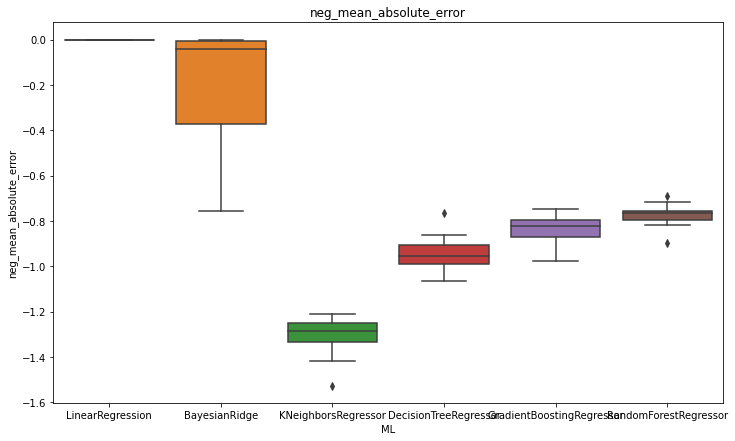

In [34]:
plt.figure(figsize=(12,7))
plt.title("neg_mean_absolute_error")
sns.boxplot(data = box_plot, x = box_plot.columns[1],y=box_plot.columns[0]);

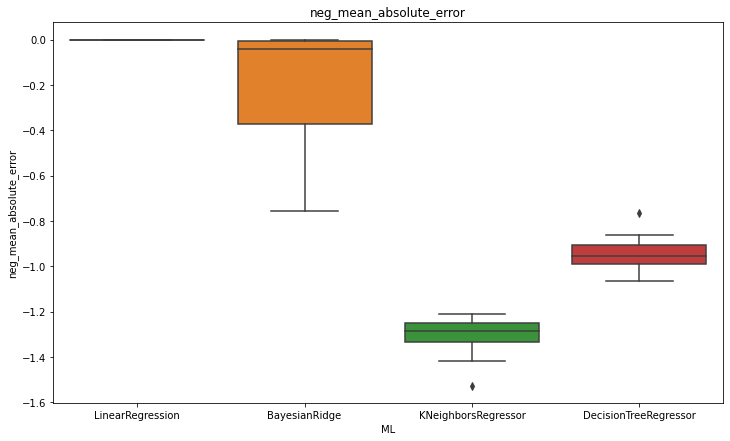

In [35]:

box_plot_new = box_plot.copy()
# box_plot_new = box_plot_new[box_plot_new['ML'] != 'Lasso']
box_plot_new = box_plot_new[box_plot_new['ML'] != 'RandomForestRegressor']
box_plot_new = box_plot_new[box_plot_new['ML'] != 'GradientBoostingRegressor']
# box_plot_new = box_plot_new[box_plot_new['ML'] != 'Lasso']
# box_plot_new = box_plot_new[box_plot_new['ML'] != 'KNeighborsRegressor']




plt.figure(figsize=(12,7))
plt.title("neg_mean_absolute_error")
sns.boxplot(data = box_plot_new, x = box_plot_new.columns[1],y=box_plot_new.columns[0]);

## Fiting separate models

# DecisionTreeRegressor

In [36]:
%%time
decTree = DecisionTreeRegressor()

grid = {
    'max_features': [None, 'sqrt', 'log2', 'max_features'],
    'criterion': ['mse', 'mae'],
    'max_depth' : np.linspace(1,5, dtype=int)
}

n_splits = 5
clf1 = GridSearchCV(decTree, grid, n_jobs=-1,
                  cv=KFold(n_splits=n_splits, shuffle=True),
                  scoring='neg_mean_absolute_error',
                  verbose=5, refit=True)

clf1.fit(X_train, y_real_train)

print()
print(clf1.best_params_)
print(clf1.best_score_)
print(clf1.best_estimator_)

name='DecisionTreeRegressor'
model = clf1
score_model = define_metrics(model, X_train, X_test, y_real_train, y_real_test, name)
score_model

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    6.0s finished



{'criterion': 'mse', 'max_depth': 5, 'max_features': None}
-1.6485070995949953
DecisionTreeRegressor(max_depth=5)
CPU times: user 1.79 s, sys: 41.7 ms, total: 1.83 s
Wall time: 5.99 s


,name,r2,sum_squared_resid,MAPE,RMSE,durbin_watson,theil_index,ex_var
0,DecisionTreeRegressor_train,0.99883598,7071.25227865,1.81102705,1.92917385,1.46768325,0.00781944,0.99883598
0,DecisionTreeRegressor_test,-0.67659124,699284.79345549,14.93501393,48.27990588,0.01546698,0.10951891,0.38655789


In [37]:
%%time
decTree_sep = clf1.best_estimator_ # DecisionTreeRegressor(criterion='mae', max_depth=4)
# decTree_sep.fit(X_train, y_real_train)

y_train_predict_decTree = decTree_sep.predict(X_train)
y_test_predict_decTree = decTree_sep.predict(X_test)

CPU times: user 3.66 ms, sys: 0 ns, total: 3.66 ms
Wall time: 3.04 ms


### Show predictions

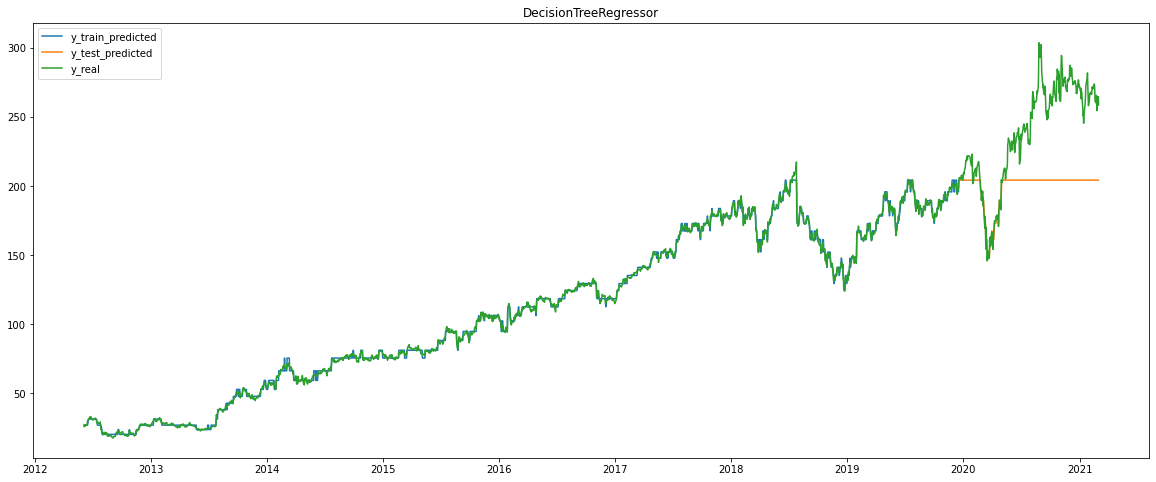

In [38]:
show_pred(y_train=y_train_predict_decTree,
         y_test=y_test_predict_decTree,
         y=y_real,
         title=name)

### Show Features importance

In [39]:
importances = decTree_sep.feature_importances_
feat_imp = dict((value, name) for value, name in zip(features, importances)) 

feat_imp = sorted(feat_imp.items(), key=lambda x: np.abs(x[1]), reverse=True)
feat_imp = pd.DataFrame(feat_imp, columns=['feature', 'value'])



In [40]:
feat_imp

,feature,value
0,window_mean_2,0.99369536
1,y-1,0.00592967
2,y-8,0.00037497
3,y-2,0.00000000
4,y-3,0.00000000
5,y-4,0.00000000
6,y-5,0.00000000
7,y-6,0.00000000
8,y-7,0.00000000
9,y-9,0.00000000


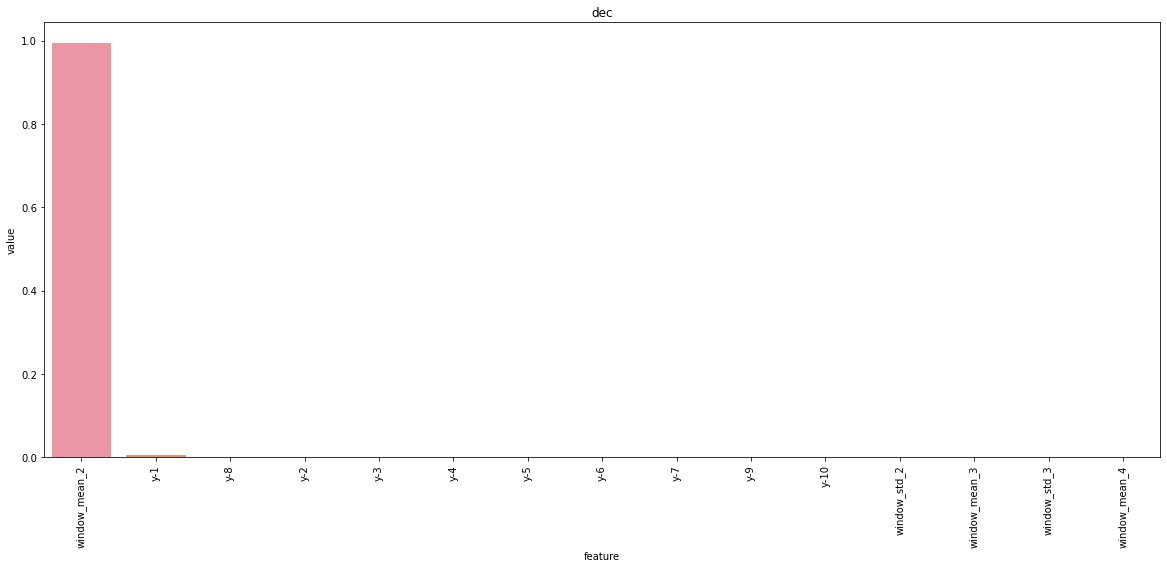

In [41]:
barplot(feat_imp[:15], title='dec')

# LinearRegression

In [42]:
%%time
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_real_train)

y_train_predict_linReg = lin_reg.predict(X_train)
y_test_predict_linReg = lin_reg.predict(X_test)
name = 'LinearRegression'

model = lin_reg
score_model = define_metrics(model, X_train, X_test, y_real_train, y_real_test, name)
score_model

CPU times: user 97.4 ms, sys: 13 µs, total: 97.5 ms
Wall time: 18.6 ms


,name,r2,sum_squared_resid,MAPE,RMSE,durbin_watson,theil_index,ex_var
0,LinearRegression_train,1.00000000,0.00000000,0.00000000,0.00000000,0.00138060,0.00000000,1.00000000
0,LinearRegression_test,1.00000000,0.00000000,0.00000000,0.00000000,0.00117067,0.00000000,1.00000000


### Show predictions

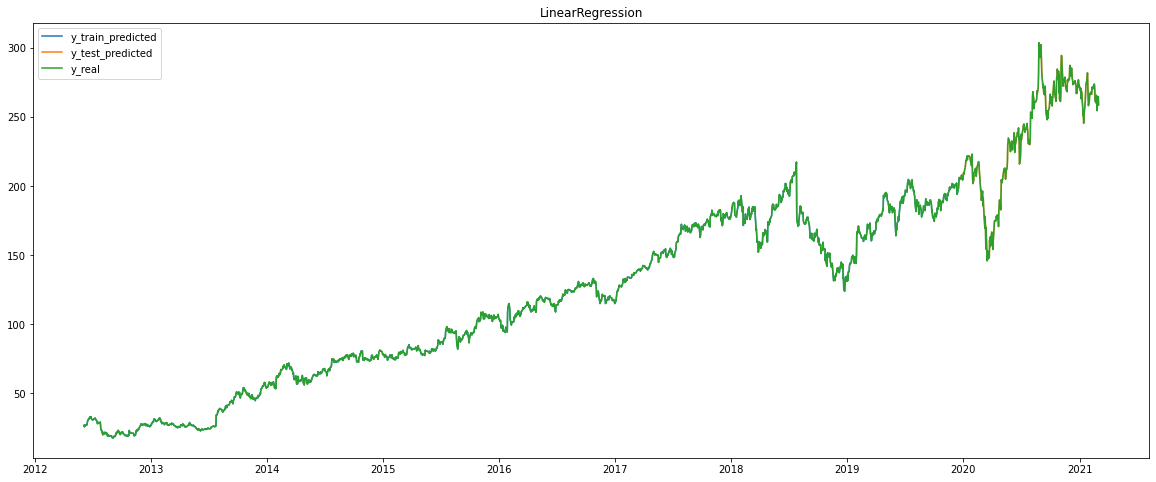

In [43]:
show_pred(y_train=y_train_predict_linReg,
         y_test=y_test_predict_linReg,
         y=y_real,
         title=name)

### Show Features importance

In [44]:
importances = lin_reg.coef_
feat_imp = dict((value, name) for value, name in zip(features, importances)) 

feat_imp = sorted(feat_imp.items(), key=lambda x: np.abs(x[1]), reverse=True)
feat_imp = pd.DataFrame(feat_imp, columns=['feature', 'value'])



In [45]:
feat_imp

,feature,value
0,window_mean_2,1.26501767
1,y-1,-1.00000000
2,window_mean_3,0.72084806
3,window_mean_4,0.50883392
4,y-2,-0.36749117
5,y-3,-0.12720848
6,y-6,-0.00000000
7,y-9,-0.00000000
8,y-8,-0.00000000
9,y-10,-0.00000000


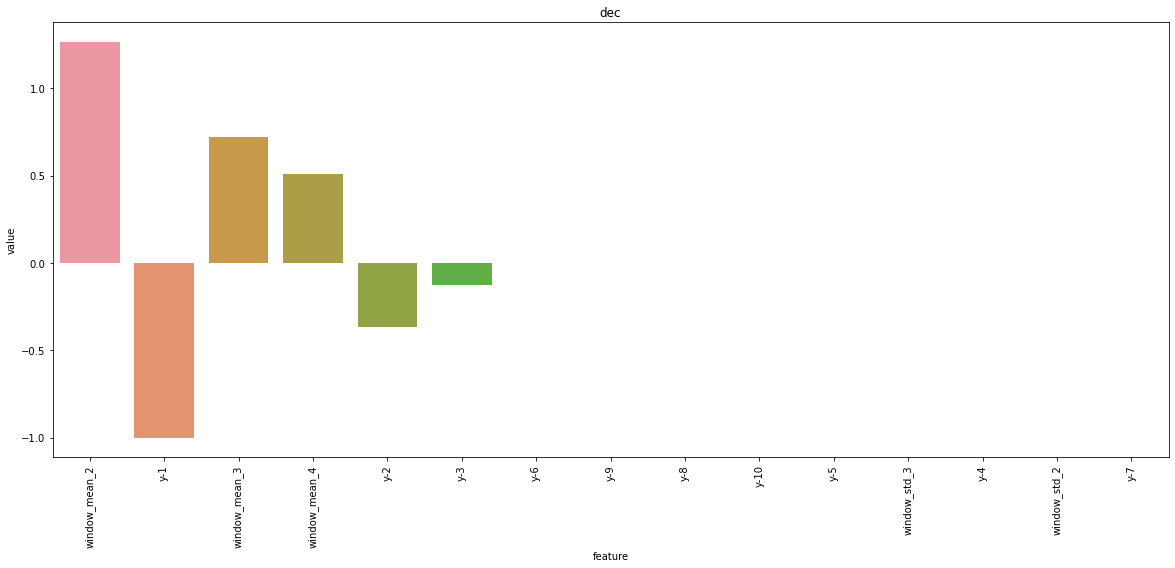

In [46]:
barplot(feat_imp[:15], title='dec')

# KNeighborsRegressor

In [47]:
%%time
knn = KNeighborsRegressor()
grid = {'n_neighbors': np.linspace(2,4, dtype=int),
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']
}

n_splits = 5
clf2 = GridSearchCV(knn, grid, n_jobs=-1,
                  cv=KFold(n_splits=n_splits, shuffle=True),
                  scoring='neg_mean_absolute_error',
                  verbose=5, refit=True)

clf2.fit(X_train, y_real_train)

print()
print(clf2.best_params_)
print(clf2.best_score_)
print(clf2.best_estimator_)

name='KNeighborsRegressor'
model = clf2
score_model = define_metrics(model, X_train, X_test, y_real_train, y_real_test, name)
score_model

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    1.7s



{'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
-1.2561239463957938
KNeighborsRegressor(algorithm='brute', n_neighbors=3, weights='distance')
CPU times: user 2.01 s, sys: 65.8 ms, total: 2.08 s
Wall time: 3.55 s


[Parallel(n_jobs=-1)]: Done 1968 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    3.5s finished


,name,r2,sum_squared_resid,MAPE,RMSE,durbin_watson,theil_index,ex_var
0,KNeighborsRegressor_train,1.00000000,0.00000000,0.00000007,0.00000077,2.04342649,0.00000000,1.00000000
0,KNeighborsRegressor_test,-0.25510920,523490.01845476,12.56062226,41.77279890,0.02244335,0.09319514,0.44622235


In [48]:
%%time
knn_sep = clf2.best_estimator_ # DecisionTreeRegressor(criterion='mae', max_depth=4)
# decTree_sep.fit(X_train, y_real_train)

y_train_predict_knn= knn_sep.predict(X_train)
y_test_predict_knn = knn_sep.predict(X_test)

CPU times: user 224 ms, sys: 28 ms, total: 252 ms
Wall time: 41.9 ms


### Show predictions

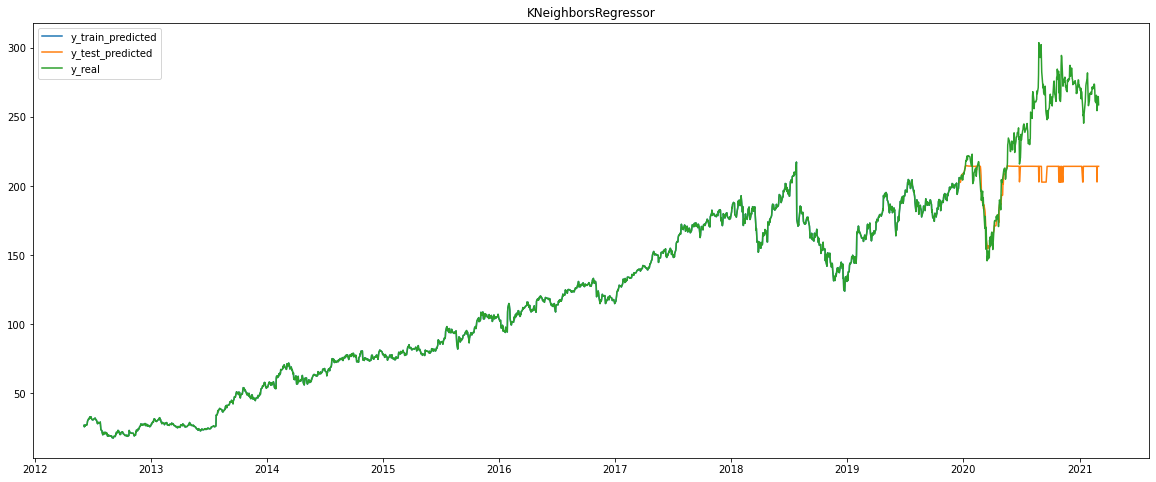

In [49]:
show_pred(y_train=y_train_predict_knn,
         y_test=y_test_predict_knn,
         y=y_real,
         title=name)

# BayesianRidge

In [50]:
%%time
bayes = BayesianRidge()
grid = {'n_iter': np.linspace(100,500, 5,dtype=int)
}

n_splits = 5
clf3 = GridSearchCV(bayes, grid, n_jobs=-1,
                  cv=KFold(n_splits=n_splits, shuffle=True),
                  scoring='neg_mean_absolute_error',
                  verbose=5, refit=True)

clf3.fit(X_train, y_real_train)

print()
print(clf3.best_params_)
print(clf3.best_score_)
print(clf3.best_estimator_)

name='BayesianRidge'
model = clf3
score_model = define_metrics(model, X_train, X_test, y_real_train, y_real_test, name)
score_model

Fitting 5 folds for each of 5 candidates, totalling 25 fits

{'n_iter': 200}
-0.07317687158019011
BayesianRidge(n_iter=200)
CPU times: user 171 ms, sys: 11.6 ms, total: 183 ms
Wall time: 101 ms


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  25 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  14 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.1s finished


,name,r2,sum_squared_resid,MAPE,RMSE,durbin_watson,theil_index,ex_var
0,BayesianRidge_train,0.99999987,0.81343660,0.03122976,0.02069117,0.00053057,0.00008386,0.99999987
0,BayesianRidge_test,0.99999828,0.71653561,0.01925711,0.04887179,0.00060406,0.00010143,0.99999987


In [51]:
%%time
bayes_sep = clf3.best_estimator_ # DecisionTreeRegressor(criterion='mae', max_depth=4)
# decTree_sep.fit(X_train, y_real_train)

y_train_predict_bayes = bayes_sep.predict(X_train)
y_test_predict_bayes = bayes_sep.predict(X_test)

CPU times: user 9.59 ms, sys: 264 µs, total: 9.85 ms
Wall time: 2.71 ms


### Show predictions

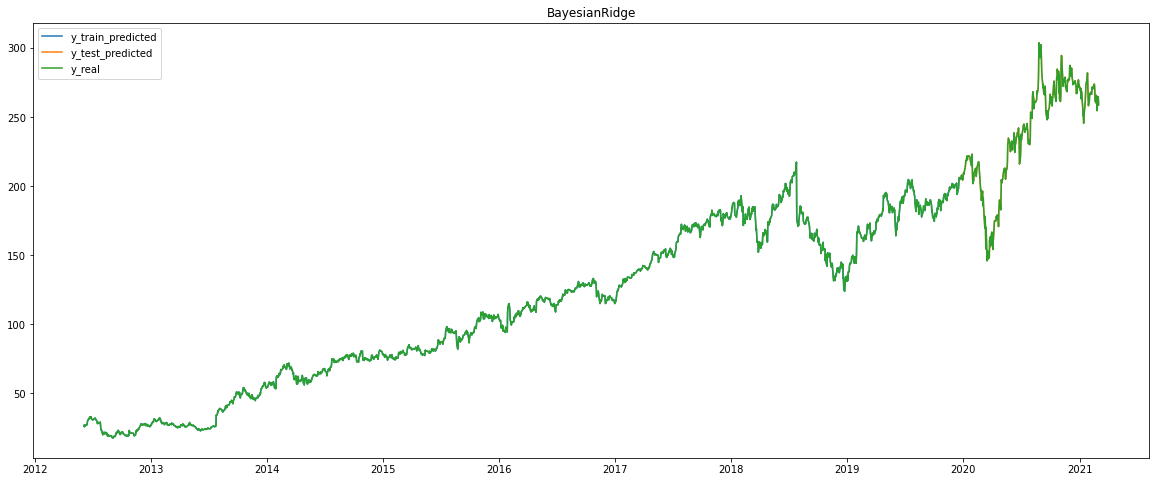

In [52]:
show_pred(y_train=y_train_predict_bayes,
         y_test=y_test_predict_bayes,
         y=y_real,
         title=name)

### Show Features importance

In [53]:
importances = bayes_sep.coef_
feat_imp = dict((value, name) for value, name in zip(features, importances)) 

feat_imp = sorted(feat_imp.items(), key=lambda x: np.abs(x[1]), reverse=True)
feat_imp = pd.DataFrame(feat_imp, columns=['feature', 'value'])

In [54]:
feat_imp

,feature,value
0,window_mean_2,1.26440430
1,y-1,-1.00000000
2,window_mean_3,0.72363281
3,window_mean_4,0.50683594
4,y-2,-0.36791992
5,y-3,-0.12658691
6,window_std_2,-0.00000000
7,y-6,0.00000000
8,y-5,-0.00000000
9,y-7,-0.00000000


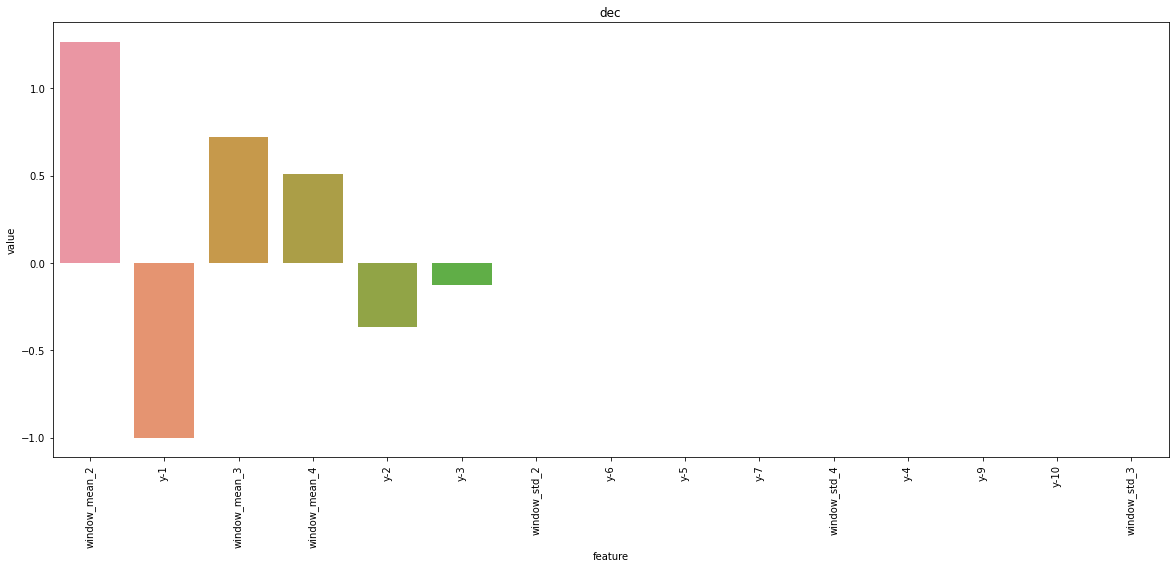

In [55]:
barplot(feat_imp[:15], title='dec')